## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.metrics import accuracy_score

## Reading the dataset

In [2]:
data = pd.read_csv("HR_comma_sep.csv.txt")
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Data exploration

In [3]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [4]:
data.shape

(14999, 10)

## Let’s explore all the categorical values and visualize them
Now, we will use the value_counts function so that we can get the unique values from every categorical type of data.

Sales

In [5]:
sales_dict = data["sales"].value_counts()
sales_dict

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

<Axes: title={'center': 'Count of different sales'}>

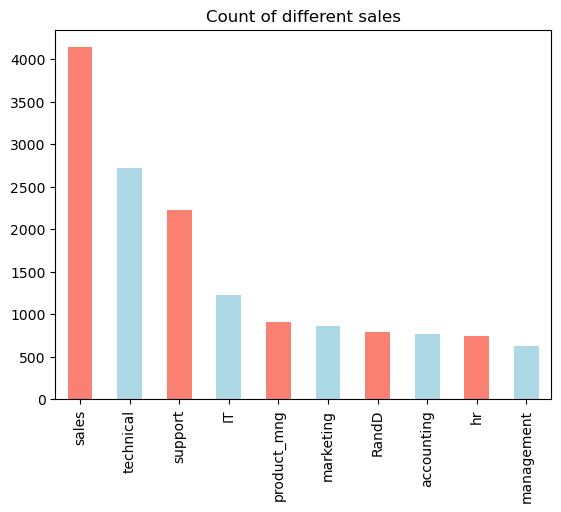

In [6]:
data['sales'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Count of different sales")

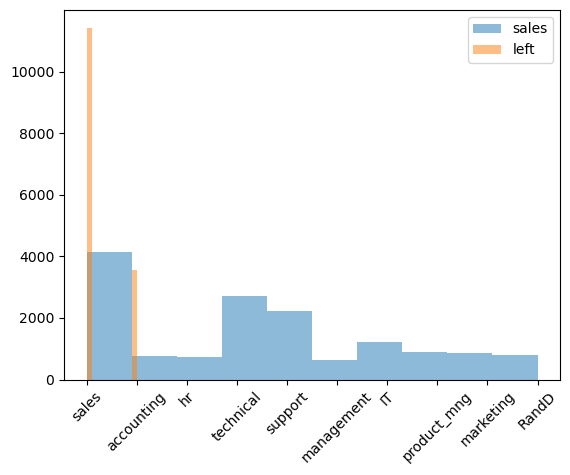

In [7]:
plt.hist(data['sales'], alpha=0.5, label='sales')
plt.hist(data['left'], alpha=0.5, label='left')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.xticks(data['sales'].unique())
plt.show()

In [8]:
salary_dict = data["salary"].value_counts()
salary_dict

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

<Axes: title={'center': 'Count of different salary'}>

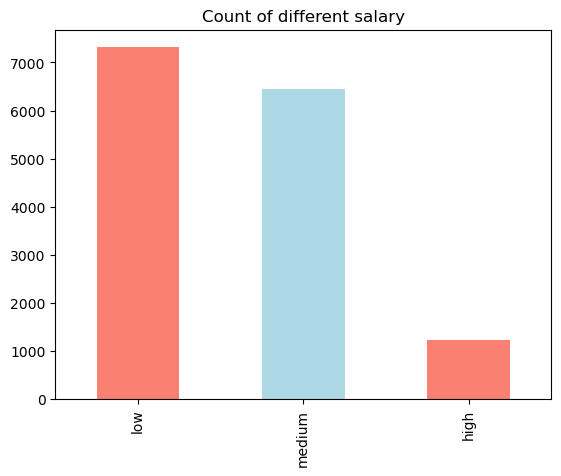

In [9]:
data['salary'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Count of different salary")

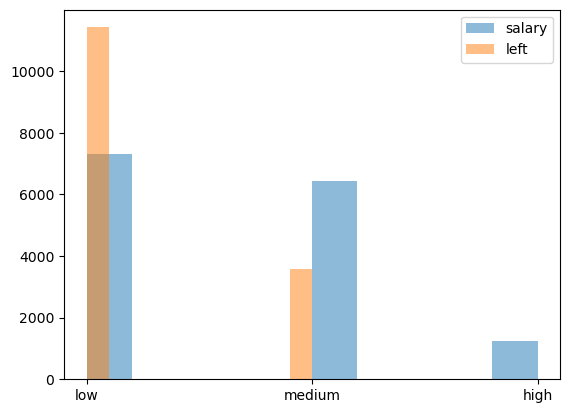

In [10]:
plt.hist(data['salary'], alpha=0.5, label='salary')
plt.hist(data['left'], alpha=0.5, label='left')
plt.legend(loc='upper right')
plt.show()

In [11]:
left = data.groupby('left')
left.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [12]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


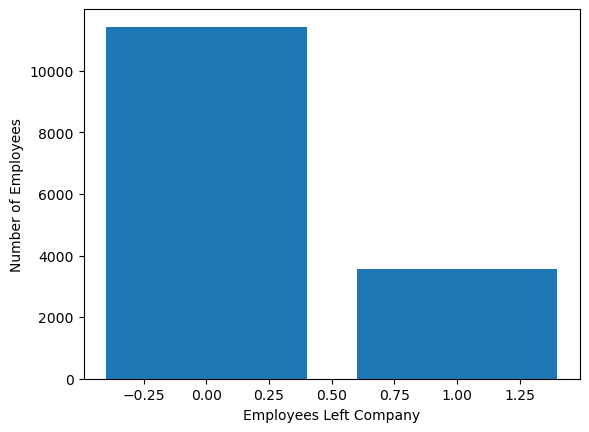

In [13]:
left_count = data.groupby('left').count()
plt.bar(left_count.index.values, left_count['satisfaction_level'])
plt.xlabel('Employees Left Company')
plt.ylabel('Number of Employees')
plt.show()

In [14]:
data.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

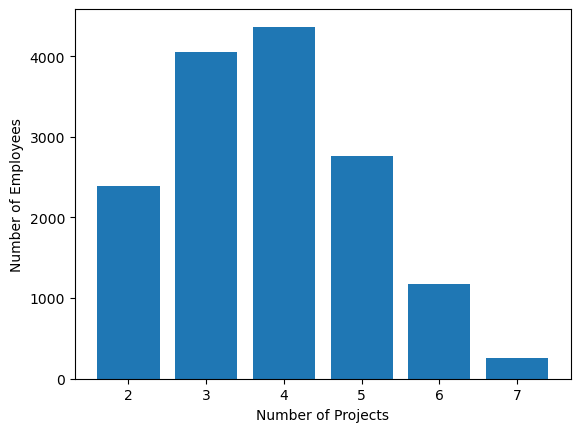

In [15]:
num_projects = data.groupby('number_project').count()
plt.bar(num_projects.index.values, num_projects['satisfaction_level'])
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.show()

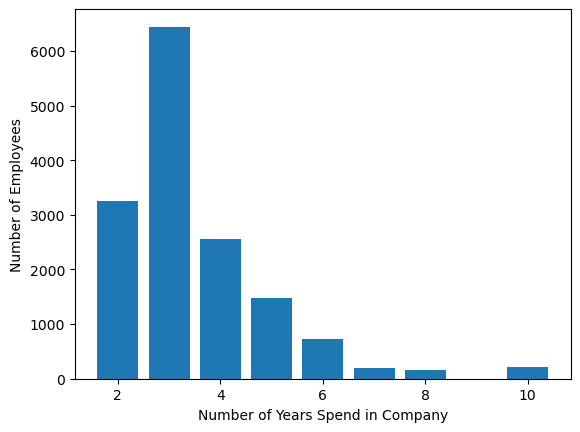

In [16]:
time_spent = data.groupby('time_spend_company').count()
plt.bar(time_spent.index.values, time_spent['satisfaction_level'])
plt.xlabel('Number of Years Spend in Company')
plt.ylabel("Number of Employees")
plt.show()

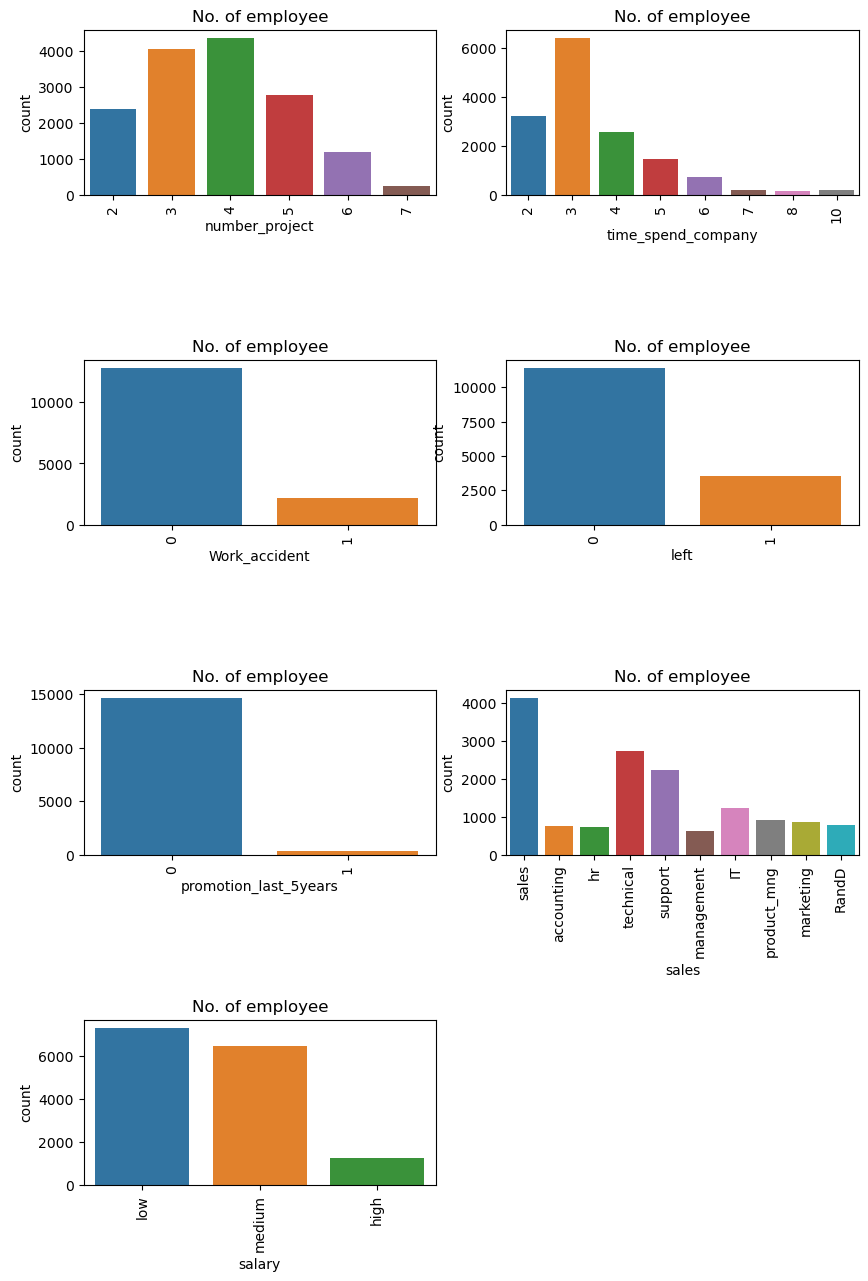

In [17]:
features = ['number_project', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']
fig = plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j, data = data)
    plt.xticks(rotation=90)
    plt.title("No. of employee")

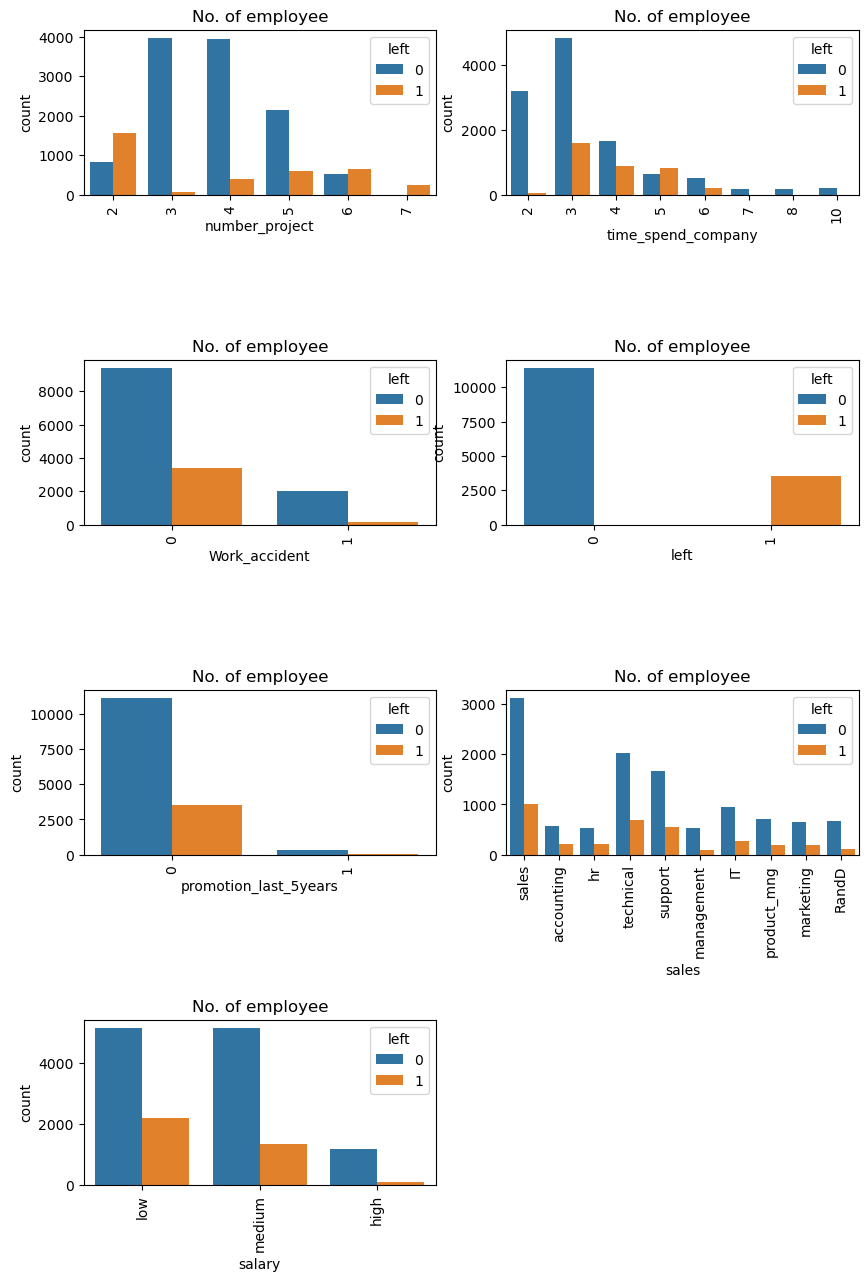

In [18]:
fig = plt.subplots(figsize=(10, 15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j, data = data, hue='left')
    plt.xticks(rotation=90)
    plt.title("No. of employee")

In [19]:
from sklearn.cluster import KMeans
left_emp = data[['satisfaction_level', 'last_evaluation']][data.left == 1]
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)

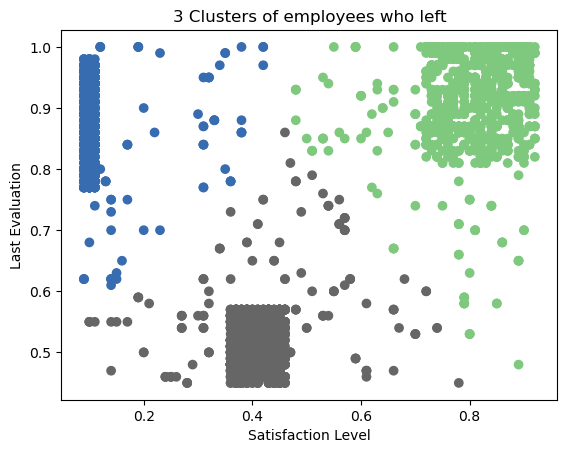

In [20]:
left_emp['label'] = kmeans.labels_
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['label'], cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.show()

In [21]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['salary'] = le.fit_transform(data['salary'])
data['sales'] = le.fit_transform(data['sales'])

In [22]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


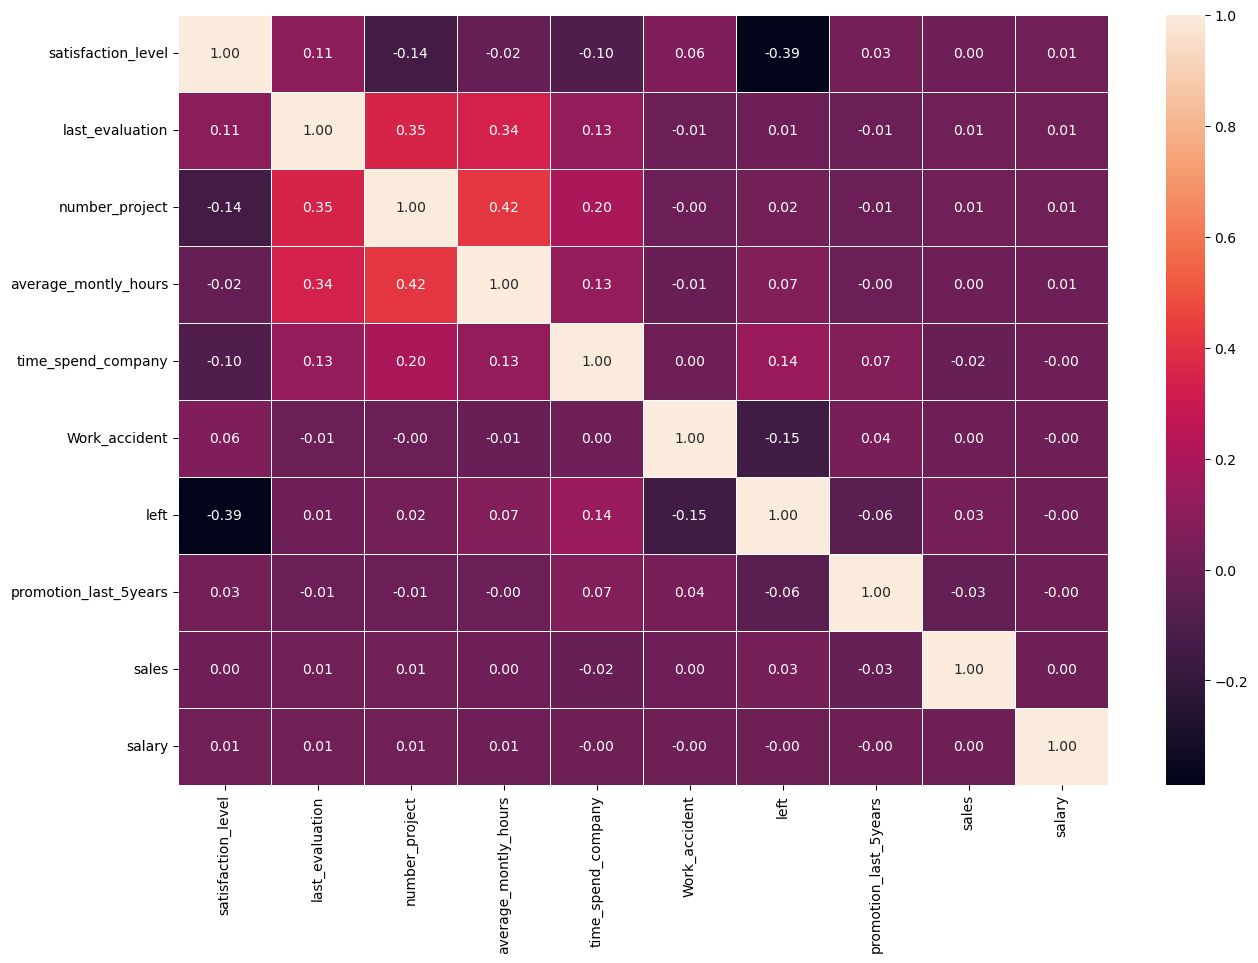

In [23]:
corr_matrix=data.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

In [24]:
X = data.drop('left', axis=1)
y = data['left']

In [25]:
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,0,7,1
1,0.80,0.86,5,262,6,0,0,7,2
2,0.11,0.88,7,272,4,0,0,7,2
3,0.72,0.87,5,223,5,0,0,7,1
4,0.37,0.52,2,159,3,0,0,7,1
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,8,1
14995,0.37,0.48,2,160,3,0,0,8,1
14996,0.37,0.53,2,143,3,0,0,8,1
14997,0.11,0.96,6,280,4,0,0,8,1


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Development

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [28]:
lr=LogisticRegression(C = 0.1, random_state = 42, solver = 'liblinear')
dt=DecisionTreeClassifier()
rm=RandomForestClassifier()
gnb=GaussianNB()
knn = KNeighborsClassifier(n_neighbors=3)
svm = svm.SVC(kernel='linear')

In [29]:
for a,b in zip([lr,dt,knn,svm,rm,gnb],["Logistic Regression","Decision Tree","KNN","SVM","Random Forest","Naive Bayes"]):
    a.fit(X_train,y_train)
    prediction=a.predict(X_train)
    y_pred=a.predict(X_test)
    score1=accuracy_score(y_train,prediction)
    score=accuracy_score(y_test,y_pred)
    msg1="[%s] training data accuracy is : %f" % (b,score1)
    msg2="[%s] test data accuracy is : %f" % (b,score)
    print(msg1)
    print(msg2)

[Logistic Regression] training data accuracy is : 0.772064
[Logistic Regression] test data accuracy is : 0.761000
[Decision Tree] training data accuracy is : 1.000000
[Decision Tree] test data accuracy is : 0.975333
[KNN] training data accuracy is : 0.969664
[KNN] test data accuracy is : 0.936667
[SVM] training data accuracy is : 0.778482
[SVM] test data accuracy is : 0.764667
[Random Forest] training data accuracy is : 0.999917
[Random Forest] test data accuracy is : 0.988667
[Naive Bayes] training data accuracy is : 0.795900
[Naive Bayes] test data accuracy is : 0.797333


## Model Scores (accuracy)

In [30]:
model_scores={'Logistic Regression':lr.score(X_test,y_test),
             'KNN classifier':knn.score(X_test,y_test),
             'Support Vector Machine':svm.score(X_test,y_test),
             'Random forest':rm.score(X_test,y_test),
              'Decision tree':dt.score(X_test,y_test),
              'Naive Bayes':gnb.score(X_test,y_test)
             }
model_scores

{'Logistic Regression': 0.761,
 'KNN classifier': 0.9366666666666666,
 'Support Vector Machine': 0.7646666666666667,
 'Random forest': 0.9886666666666667,
 'Decision tree': 0.9753333333333334,
 'Naive Bayes': 0.7973333333333333}

## Here, we can see that Random forest and Decision tree have the best accuracy.

In [31]:
#Classification Report of Random forest
from sklearn.metrics import classification_report

rm_y_preds = rm.predict(X_test)

print(classification_report(y_test,rm_y_preds))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2294
           1       0.99      0.96      0.98       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



In [32]:
#Classification Report of Decision tree
from sklearn.metrics import classification_report

dt_y_preds = dt.predict(X_test)

print(classification_report(y_test,dt_y_preds))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2294
           1       0.93      0.96      0.95       706

    accuracy                           0.98      3000
   macro avg       0.96      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000



### Model Comparison
Based on the accuracy

In [33]:
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare

,Logistic Regression,KNN classifier,Support Vector Machine,Random forest,Decision tree,Naive Bayes
accuracy,0.761,0.936667,0.764667,0.988667,0.975333,0.797333


### Visualize the accuracy of each model

<Axes: >

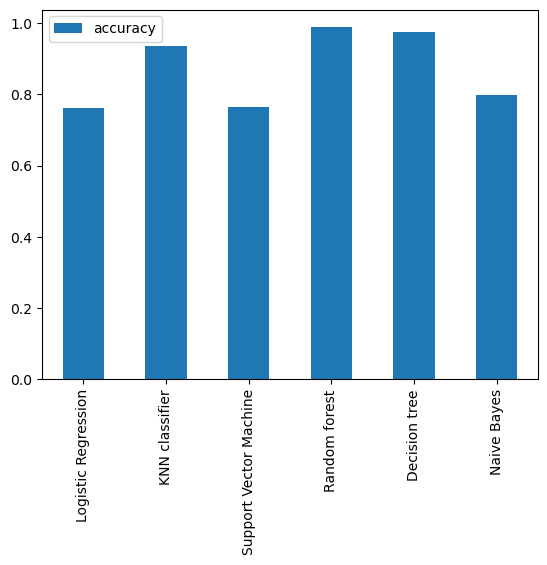

In [34]:
model_compare.T.plot(kind='bar') # (T is here for transpose)

In [35]:
#Feature importance
#These “coef’s” tell how much and in what way did each one of them contribute to predicting the target variable

# Logistic regression
feature_dict=dict(zip(data.columns,list(lr.coef_[0])))
feature_dict
#This is a type of Model-driven Exploratory data analysis.

{'satisfaction_level': -3.7517443727503847,
 'last_evaluation': 0.4534616257840054,
 'number_project': -0.26667567619209376,
 'average_montly_hours': 0.004643780763934847,
 'time_spend_company': 0.2180780383372898,
 'Work_accident': -1.344556460917759,
 'left': -1.0626792534086769,
 'promotion_last_5years': 0.036458647873358015,
 'sales': 0.0306067255478439}

<Axes: title={'center': 'Feature Importance'}>

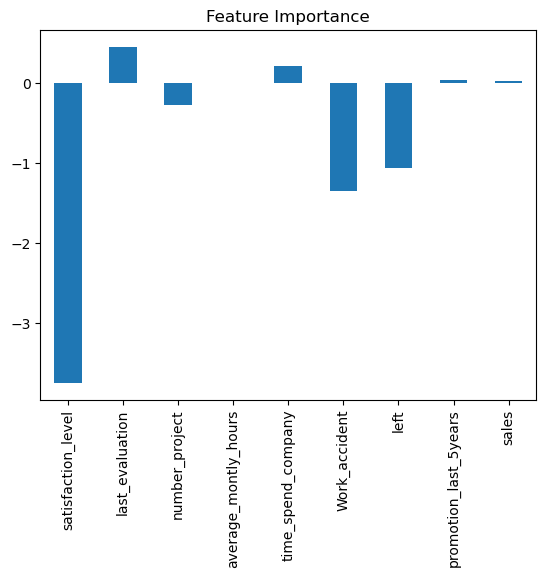

In [36]:
#Visualize feature importance
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind="bar",legend=False,title="Feature Importance")

In [37]:
#Feature Selection
from sklearn.feature_selection import SelectFromModel

In [38]:
models = [
    ('Random Forest', RandomForestClassifier()),
    ('Decision tree', DecisionTreeClassifier()),
]

for name, model in models:
    selector = SelectFromModel(model)
    selector.fit(X_train, y_train)
    
    X_train_selected = selector.transform(X_train)
    X_test_selected = selector.transform(X_test)
    
    clf = model.fit(X_train_selected, y_train)
    
    y_pred = clf.predict(X_test_selected)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} - Selected Features Accuracy: {accuracy:.2f}")

Random Forest - Selected Features Accuracy: 0.99
Decision tree - Selected Features Accuracy: 0.97


In [39]:
#Saving the best model
#Approach -1
#Random forest model because it has the best accuracy as well it is neither overfitted nor under fitted

import pickle

# Save the trained model as a pickle string.
saved_model = pickle.dumps(rm)

# Load the pickled model
rm_from_pickle = pickle.loads(saved_model)

# Use the loaded pickled model to make predictions
rm_from_pickle.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [40]:
#Approach – 2
# loading dependency
import joblib

# saving our model - model - model , filename - model_lr
joblib.dump(rm , 'model_rm')

# opening the file- model_jlib
m_jlib = joblib.load('model_rm')

# check prediction
m_jlib.predict(X_test) # similar output

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)